# Making animations using matplotlib's FuncAnimation

*CU Boulder GEOL 3600 / 5700 Introduction to Python Programming, Nov 2023*

### Goal: learn to use FuncAnimation to create and save animations

## Overview

- Animations can be powerful ways of visualizing and communicating data and models

- An animation is just a sequence of still images that are played in sequence

- Lots of ways to create animations in Python

- The one we're exploring today is `FuncAnimation`

## How `FuncAnimation` works

1. Create an initial matplotlib plot using `subplots()`, and save the `figure` object that it returns.

2. Write a function that updates your plot, creating one frame for your animation. The function should take the frame number (an integer) as an argument.

3. Call `FuncAnimation()`, passing it your `figure` object and your function. It returns an `animation` object.

4. To play the animation in a notebook, convert it to an HTML object. 


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

### Example: a moving ball

In this example, we'll animate a ball moving from lower left to upper right.

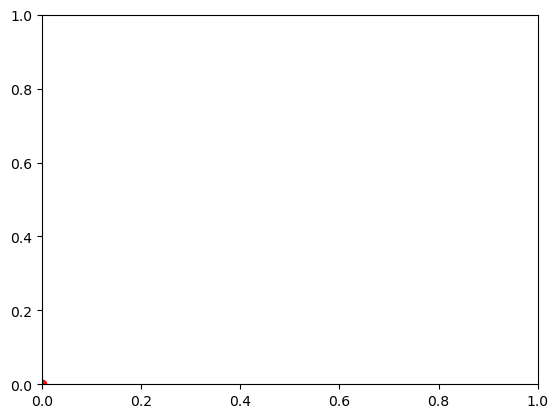

In [2]:
# 1. create a blank figure
fig, ax = plt.subplots()

# 2. define a function to update the plot
def plot_ball(frame_num):
    x = y = frame_num / 10.0
    ax.cla()
    ax.plot(x, y, 'ro')
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)

# 3. Call FuncAnimation
anim = FuncAnimation(fig, plot_ball, 11)

In [3]:
# 4. Convert the animation to an HTML object
vid = HTML(anim.to_jshtml())
vid

### Try it yourself

- What happens if you comment out the `ax.cla()` ("clear axis") line in `plot_ball()`?

- What happens if you comment out `set_xlim()` or `set_ylim()` calls?

- Try modifying the code to have your ball move from lower left to upper right over 51 iterations instead of 11.

- Try specifying an interval between frames, in milliseconds, using the `FuncAnimation` keyword parameter `interval` (the default is 200 milliseconds).

- Try running `help()` on `FuncAnimation` see what other optional keyword parameters are available.

In [4]:
# (copy-paste the above code here and then experiment with it)

## Example: animating a timeseries plot

The next example uses the Mauna Loa monthly CO2 records, which we'll start by reading from a text file.

In [5]:
import pandas as pd

# Read Mauna Loa monthly CO2 data
data = pd.read_table("co2_mm_mlo.txt", skiprows=41, header=None, delim_whitespace=True)
data.columns = [
    "year",
    "month",
    "decimal date",
    "monthly average",
    "de-seasonalized",
    "# days",
    "std. of days",
    "unc of mon mean",
]
data

year  month  decimal date  monthly average  de-seasonalized  # days  \
0    1958      3     1958.2027           315.70           314.43      -1   
1    1958      4     1958.2877           317.45           315.16      -1   
2    1958      5     1958.3699           317.51           314.71      -1   
3    1958      6     1958.4548           317.24           315.14      -1   
4    1958      7     1958.5370           315.86           315.18      -1   
..    ...    ...           ...              ...              ...     ...   
781  2023      4     2023.2917           423.36           420.69      28   
782  2023      5     2023.3750           424.00           420.55      31   
783  2023      6     2023.4583           423.68           421.19      29   
784  2023      7     2023.5417           421.83           421.42      21   
785  2023      8     2023.6250           419.68           421.62      21   

     std. of days  unc of mon mean  
0           -9.99            -0.99  
1           -9.99            -0.99  
2           -9.99            -0.99  
3           -9.99            -0.99  
4           -9.99            -0.99  
..            ...              ...  
781          0.60             0.22  
782          0.69             0.24  
783          0.57             0.20  
784          0.48             0.20  
785          0.46             0.19  

[786 rows x 8 columns]

Now we'll animate it, using a red circle to denote the current data point, and a blue line to indicate all preceding data. (Here we'll plot every 4th data point to speed up the process and save on memory.)

In [6]:
# Shorthand
decdate = data["decimal date"]
co2 = data["monthly average"]

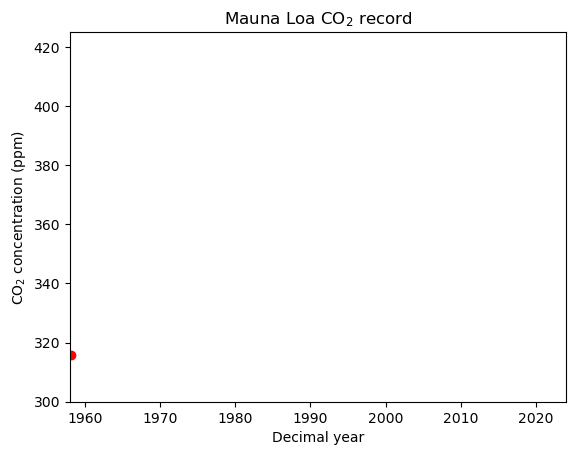

In [7]:
# 1. Create a blank plot
fig, ax = plt.subplots()

# 2. Define function for plotting
def plot_co2(i):
    ax.cla()
    ax.plot(decdate[:(4*i+1)], co2[:(4*i+1)], 'b')
    ax.plot(decdate[4*i], co2[4*i], 'ro')
    ax.set_xlim(1958, 2024)
    ax.set_ylim(300, 425)
    ax.set_xlabel("Decimal year")
    ax.set_ylabel(r"CO$_2$ concentration (ppm)")
    ax.set_title(r"Mauna Loa CO$_2$ record")

# 3. Create a FuncAnimation object
anim = FuncAnimation(fig, plot_co2, len(co2) // 4, interval=60.0)

# 4. Convert to an HTML object
vid = HTML(anim.to_jshtml())

# 5. Play
vid